In [208]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

# Cargamos el dataset del Titanic
df = sns.load_dataset('titanic')

# Mostramos las primeras filas del dataset
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [209]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 891
Total de variables disponibles (columnas) = 15 
Columnas que cuentan con un valor nulo -
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [210]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [211]:
df2 = df2.drop(columns='deck')

In [212]:
df2['age']= df2['age'].interpolate()
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [213]:
if df2['embarked'].isnull().any():
    moda_embarked = df2['embarked'].mode()[0]
df2['embarked'].fillna(moda_embarked,inplace=True)

In [214]:
if df2['embark_town'].isnull().any():
    moda_town = df2['embark_town'].mode()[0]
df2['embark_town'].fillna(moda_town,inplace=True)

In [215]:
df2.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [216]:
import pylab
import scipy.stats as stats

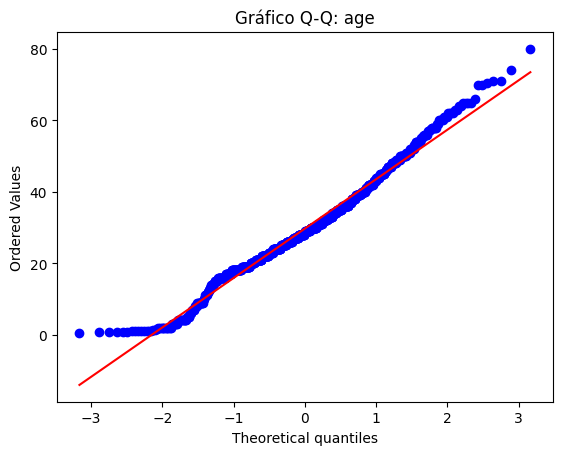

In [217]:
# Función para crear gráficos Q-Q
def crear_quantile(variable, j):
    plt.figure(j)
    stats.probplot(df2[variable], dist="norm", plot=pylab)
    plt.title('Gráfico Q-Q: ' + variable)
    plt.show()

# Generar gráficos Q-Q para cada variable    
variables = ['age']
j = 0
for variable in variables:
    crear_quantile(variable,j)
    j += 1

In [218]:
from scipy.stats import shapiro

In [219]:
def calcular_shapiro(variable):
    estadistico,p_value = stats.shapiro(df2[variable])
    print(f"Estadístico de {variable} = {estadistico: .2f}, p-valor de = {p_value: .4f}")

In [220]:
# Calcular la prueba de Shapiro-Wilk para cada variable
for variable in variables:
    calcular_shapiro(variable)

Estadístico de age =  0.98, p-valor de =  0.0000
